### Compute the Adaptive Dimension Reduction Expectation Maximization (ADR-EM) algorithm

Ding C, Xiaofeng He, Hongyuan Zha, Simon HD (2002). “Adaptive Dimension Reduction for
Clustering High Dimensional Data.” In *Proceedings 2002 IEEE International Conference on Data
Mining*, 147–154.

In [106]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(X.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [102]:
K = 32 # we want 32 clusters
r = K - 1 # reduced-dimension subspace

In [107]:
labels = pd.read_csv('data/sketches_metadata.csv')
labels = labels.sort_values(by='fc6_sketch_pca_ind')
features = np.load('data/sketches_fc6_pca.npy')

In [108]:
# scale data to mean 0 variance 1 per dimension
features = features - features.mean(axis=0) + (np.random.rand() / 1000000)
features /= features.std(axis=0)
features = PCA(n_components=r).fit_transform(features)

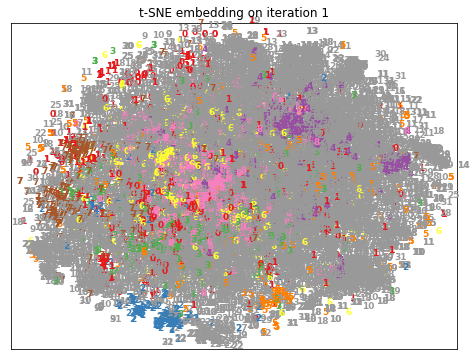

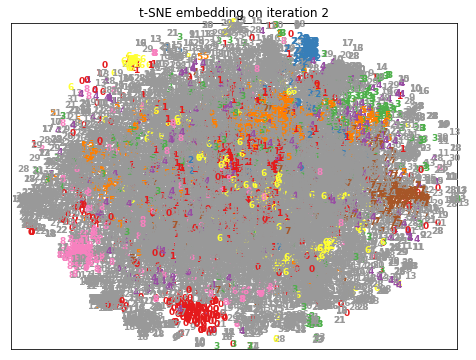

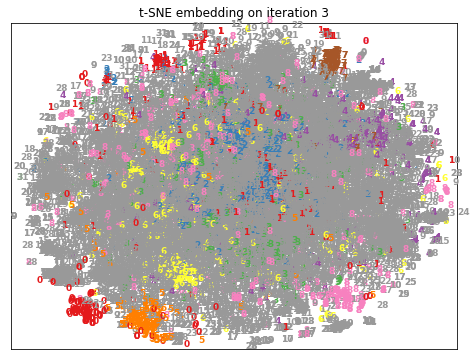

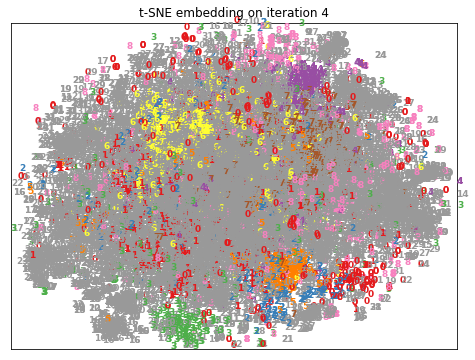

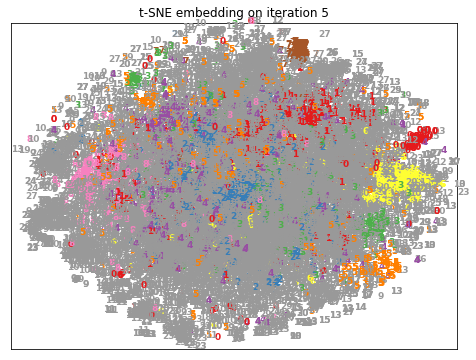

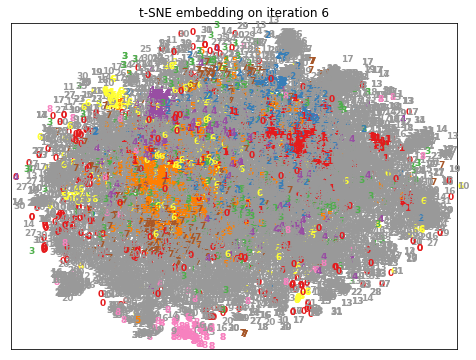

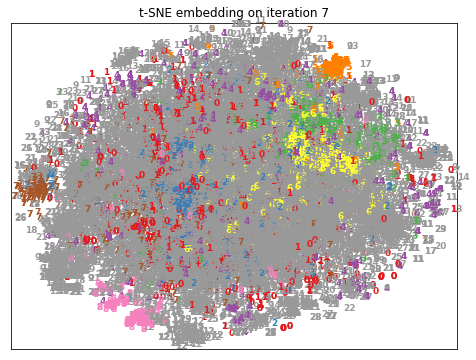

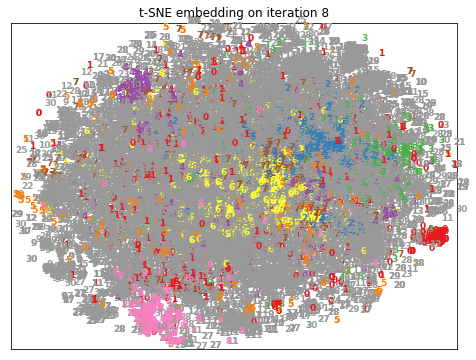

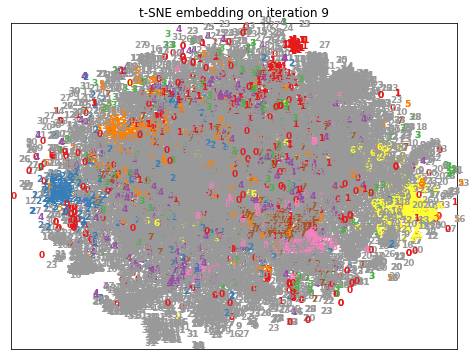

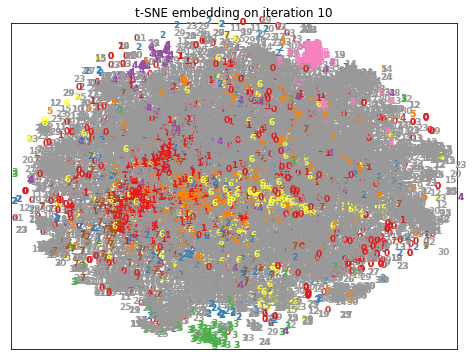

In [109]:
for i in range(10):
    pred_labels = GaussianMixture(n_components=K, random_state=0).fit_predict(features)
    features = LinearDiscriminantAnalysis().fit_transform(features, pred_labels)
    features_TSNE = TSNE(n_components=2,random_state=0).fit_transform(features)
    y=pred_labels
    plot_embedding(features_TSNE, f"t-SNE embedding on iteration {i+1}")
    plt.show()


In [88]:
np.unique(pred_labels[labels[labels.category == 'axe']['fc6_sketch_pca_ind'].values], return_counts=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int64),
 array([13,  7,  9, 12, 20,  9,  3, 11, 13,  6, 10, 14,  4,  3, 14, 14, 28,
         5, 16, 16, 10,  5, 16,  6,  9, 16, 23, 13, 17, 13, 22,  7],
       dtype=int64))

In [66]:
np.unique(pred_labels[labels[labels.category == 'airplane']['fc6_sketch_pca_ind'].values], return_counts=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int64),
 array([ 9,  6,  8, 10, 18,  8,  8, 13,  7, 11,  8, 17, 19, 15,  6, 11, 11,
         6, 12, 30, 31, 11,  7,  7, 16,  8,  5,  4, 14, 12, 18, 18],
       dtype=int64))

In [67]:
gm.means_ # K x d matrix of cluster centers

array([[-6.90188635e-01, -2.70570090e-01, -4.57629710e-01,
         1.00013051e+00, -3.07992491e-01,  4.32796983e-01,
         1.13733689e+00,  1.93529040e-01,  4.88560237e-01,
        -6.13509878e-02,  3.27221595e-01, -9.93054784e-01,
        -7.07455292e-01,  1.13004958e+00,  5.97425297e-01,
         6.15594731e-01,  5.67863309e-01,  2.64525043e-01,
        -1.10215806e-01, -1.17390523e+00,  3.40454068e-01,
         1.17196772e-01,  1.41972536e-01, -5.95134029e-01,
        -3.25145781e-01,  4.94207013e-01,  1.70365238e+00,
        -4.13588708e-01, -1.12225866e+00,  1.23152185e-01,
         3.91581795e-01],
       [ 4.42585566e-01, -4.43056773e-01,  2.54126938e-01,
         4.86169612e-01, -1.68157971e-01,  2.40232989e-01,
        -1.72200997e-01,  2.02145549e-01, -5.82528380e-01,
        -2.76206058e-01,  7.76582092e-03,  5.45480741e-01,
         1.05183158e-01,  8.30559252e-04, -5.17927997e-01,
         1.27930734e-01,  2.41886682e-02,  5.68278293e-02,
         2.74701788e-01, -8.39